In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import struct

In [2]:
def perceptron(x, y, lr=0.0001, maksimalan_broj_koraka = 100):
    w = np.random.random(len(x[0]))
    for _ in range(maksimalan_broj_koraka):
        for i, x_p in enumerate(x):
            y_p = x_p@w
            
            if y_p > 0:
                y_p = 1
            else:
                y_p = 0
            
            for j in range(len(w)):
                w[j] = w[j] + (y[i] - y_p)*x_p[j]*lr
    
    def model(x):
        return np.where(x@w > 0, 1, 0)
    
    return model

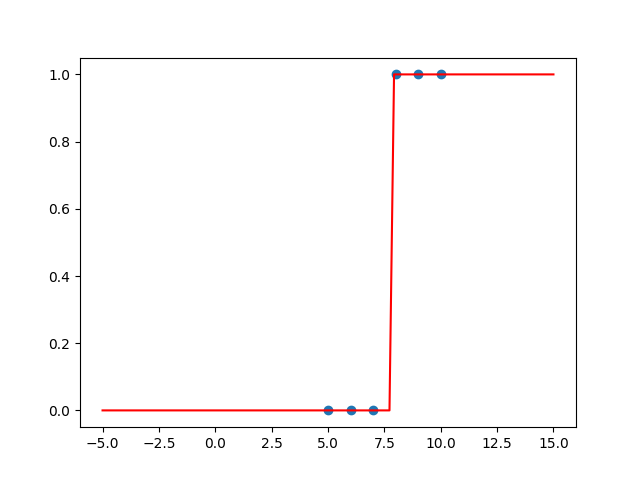

In [3]:
x = np.array([5, 6, 7, 8, 9, 10])
y = np.array([0, 0, 0, 1, 1, 1])

xx = np.column_stack((x, np.ones(len(x)) ))
perceptron_model = perceptron(xx, y, lr=0.01, maksimalan_broj_koraka = 1000)

x_novo = np.linspace(-5, 15, 100)
xx_novo = np.column_stack((x_novo, np.ones(len(x_novo)) ))

plt.figure()
plt.scatter(x, y)
plt.plot(x_novo, perceptron_model(xx_novo), c='r')
plt.show()

In [4]:
def greska(y_p, y):
    return (y_p - y)**2

def izvod_greske(y_p, y):
    return 2*(y_p - y)

def s(x):
    return 1/(1+np.exp(-x))

def izvod_s(x):
    return s(x)*(1-s(x))

def logisticka_regresija(x, y, lr=0.0001, maksimalan_broj_koraka = 100):
    w = np.random.random(len(x[0]))
    for _ in range(maksimalan_broj_koraka):
        for i, x_p in enumerate(x):
            wd = np.zeros(len(w))
            y_p = s(x_p@w)
            for j in range(len(w)):
                wd[j] = izvod_greske(y_p, y[i])*izvod_s(x_p@w)*x_p[j]
            w = w - wd*lr
    
    def model(x):
        return s(x@w)
    
    return model

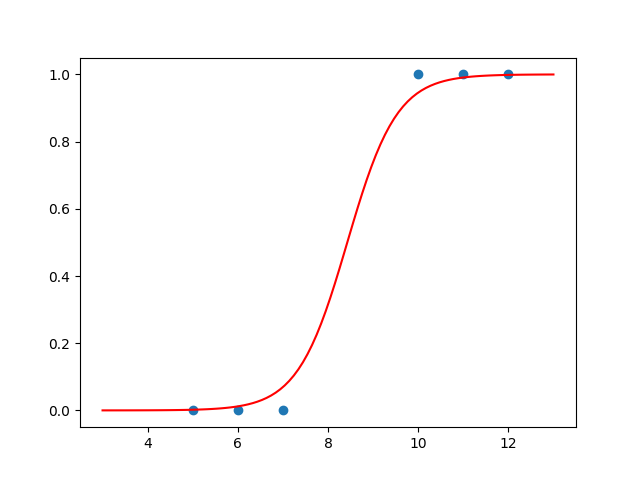

In [5]:
x = np.array([5, 6, 7, 10, 11, 12])
y = np.array([0, 0, 0, 1, 1, 1])

xx = np.column_stack((x, np.ones(len(x)) ))
log_reg_model = logisticka_regresija(xx, y, lr=0.1, maksimalan_broj_koraka = 10000)

x_novo = np.linspace(3, 13, 100)
xx_novo = np.column_stack((x_novo, np.ones(len(x_novo)) ))

plt.figure()
plt.scatter(x, y)
plt.plot(x_novo, log_reg_model(xx_novo), c='r')
plt.show()

In [6]:
def load_labels(path):
    with open(path, "rb") as fp:
        struct.unpack(">I", fp.read(4))
        number_of_labels = struct.unpack(">I", fp.read(4))[0]
        labels = np.frombuffer(fp.read(number_of_labels), dtype=np.uint8)
        return labels

def load_images(path):
    with open(path, "rb") as fp:
        struct.unpack(">I", fp.read(4))
        number_of_images = struct.unpack(">I", fp.read(4))[0]
        rows = struct.unpack(">I", fp.read(4))[0]
        cols = struct.unpack(">I", fp.read(4))[0]
        images = np.frombuffer(fp.read(number_of_images*rows*cols), dtype=np.uint8).reshape((number_of_images, rows, cols))
        return images

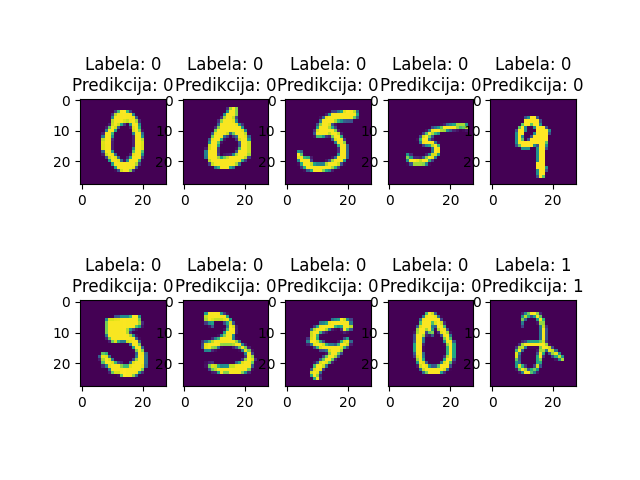

In [9]:
mnist_train_labels = load_labels("train-labels.idx1-ubyte")
mnist_train_images = load_images("train-images.idx3-ubyte")

mnist_test_labels = load_labels("t10k-labels.idx1-ubyte")
mnist_test_images = load_images("t10k-images.idx3-ubyte")

vektori = mnist_train_images.reshape(mnist_train_images.shape[0], mnist_train_images.shape[1]*mnist_train_images.shape[2])
labele = np.where(mnist_train_labels == 2, 1, 0) # Labele za cifru 2.

model = perceptron(vektori, labele, lr=0.0001, maksimalan_broj_koraka = 1)
    
odabrane_labele = np.random.choice(list(range(len(mnist_test_labels))), 10)
odabrane_slike = mnist_test_images[odabrane_labele].reshape(mnist_test_images[odabrane_labele].shape[0], mnist_test_images[odabrane_labele].shape[1]*mnist_test_images[odabrane_labele].shape[2])

rezultat = model(odabrane_slike)

stvarne_labele = np.where(mnist_test_labels[odabrane_labele] == 2, 1, 0)
predikcija_labela = np.where(mnist_test_labels[odabrane_labele] == 2, 1, 0)

plt.figure()
for i, c in enumerate(odabrane_labele):
    plt.subplot(2, 5, i+1, title=f"Labela: {stvarne_labele[i]}\nPredikcija: {predikcija_labela[i]}")
    plt.imshow(mnist_test_images[c].reshape(28, 28))
plt.show()
